In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [132]:
data = pd.read_csv('spam.csv', encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [133]:
data_clean = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data_clean.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [134]:
data_clean = data_clean.rename(columns = {'v1' : 'Type', 'v2' : 'Text'})
data_clean.head()

,Type,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [135]:
data_clean.isnull().sum()

Type    0
Text    0
dtype: int64

In [136]:
data_clean.duplicated().sum()

403

In [137]:
data_clean.drop_duplicates(inplace = True)
data_clean.duplicated().sum()

0

In [138]:
data_clean.shape

(5169, 2)

In [139]:
data_clean['Type'].value_counts()

Type
ham     4516
spam     653
Name: count, dtype: int64

In [140]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_clean['Type'] = encoder.fit_transform(data_clean['Type'])
data_clean.head()

,Type,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


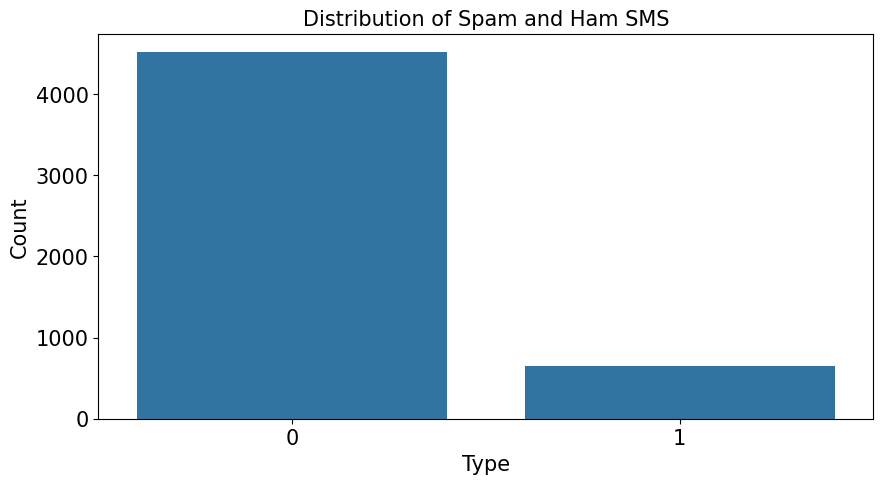

In [141]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Type', data = data_clean)
plt.xlabel('Type',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.title('Distribution of Spam and Ham SMS',fontsize = 15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.show()

In [142]:
x = data_clean['Text']
y = data_clean['Type']

In [143]:
count = CountVectorizer()
text = count.fit_transform(x)


In [144]:
x_train, x_test, y_train, y_test = train_test_split(text , y , test_size = 0.2, random_state = 1)

In [106]:
x_train

<4135x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 54703 stored elements in Compressed Sparse Row format>

In [107]:
x_test

<1034x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 13315 stored elements in Compressed Sparse Row format>

In [145]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [146]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [147]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [148]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [149]:
print(model.score(x_test,y_test))
print(lr.score(x_test,y_test))
print(rf.score(x_test,y_test))
print(svm.score(x_test,y_test))

0.9758220502901354
0.965183752417795
0.9642166344294004
0.9709864603481625


In [150]:
y_pred = model.predict(x_test)
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = svm.predict(x_test)

In [151]:
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred1)
cm3 = confusion_matrix(y_test, y_pred2)
cm4 = confusion_matrix(y_test, y_pred3)

In [152]:
cm1_accuracy = accuracy_score(y_test, y_pred)
cm2_accuracy = accuracy_score(y_test, y_pred1)
cm3_accuracy = accuracy_score(y_test, y_pred2)
cm4_accuracy = accuracy_score(y_test, y_pred3)

In [153]:
print('classification report of Naive Bayes:\n',classification_report(y_test, y_pred))
print('classification report of LinearRegression:\n',classification_report(y_test, y_pred1))
print('classification report of Random Forest:\n',classification_report(y_test, y_pred2))
print('classification report of SVM:\n',classification_report(y_test, y_pred3))

classification report of Naive Bayes:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       899
           1       0.89      0.93      0.91       135

    accuracy                           0.98      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.98      0.98      0.98      1034

classification report of LinearRegression:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       899
           1       0.95      0.77      0.85       135

    accuracy                           0.97      1034
   macro avg       0.96      0.88      0.92      1034
weighted avg       0.96      0.97      0.96      1034

classification report of Random Forest:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       899
           1       1.00      0.73      0.84       135

    accuracy                           0.96      1034
   m

In [156]:
SMS = input("Enter SMS here")
Predict_SMS = count.transform([SMS])
print(model.predict(Predict_SMS))
if model.predict(Predict_SMS) == 1:
    print("Spam SMS")
else:
    print("Ham SMS")


Enter SMS hereOur records show you overpaid for (a product or service). Kindly supply your bank routing and account number to receive your refund.
[1]
Spam SMS
